# Unemployment Analysis with Python

step 1 :- Import Required Libraries


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


step 2 :- Load the Datasets

In [20]:
# Load both datasets
df1 = pd.read_csv("/content/Unemployment in India.csv")
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

# Display basic info
print("Dataset 1:\n", df1.head(), "\n")
print("Dataset 2:\n", df2.head())

Dataset 1:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural   

Dataset 2:
            Region         Date  Frequency   Estimated U

step 3 :- Data Cleaning

In [21]:
# Clean column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert Date columns to datetime
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')

# Drop rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Confirm changes
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     

step 4 :- Exploratory Data Analysis (EDA)

In [22]:
# Summary
print(df2.describe())

# Unique regions and zones
print("\nRegions:", df2['Region'].nunique())
print("Zones:", df2['Region.1'].unique())

                                Date  Estimated Unemployment Rate (%)  \
count                            267                       267.000000   
mean   2020-06-16 09:15:30.337078528                        12.236929   
min              2020-01-31 00:00:00                         0.500000   
25%              2020-03-31 00:00:00                         4.845000   
50%              2020-06-30 00:00:00                         9.650000   
75%              2020-08-31 00:00:00                        16.755000   
max              2020-10-31 00:00:00                        75.850000   
std                              NaN                        10.803283   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        2.670000e+02                               267.000000   
mean         1.396211e+07                                41.681573   
min          1.175420e+05                                16.770000   
25%          2.838930e+06                                37.26

step 5 :- Unemployment Trend by Region

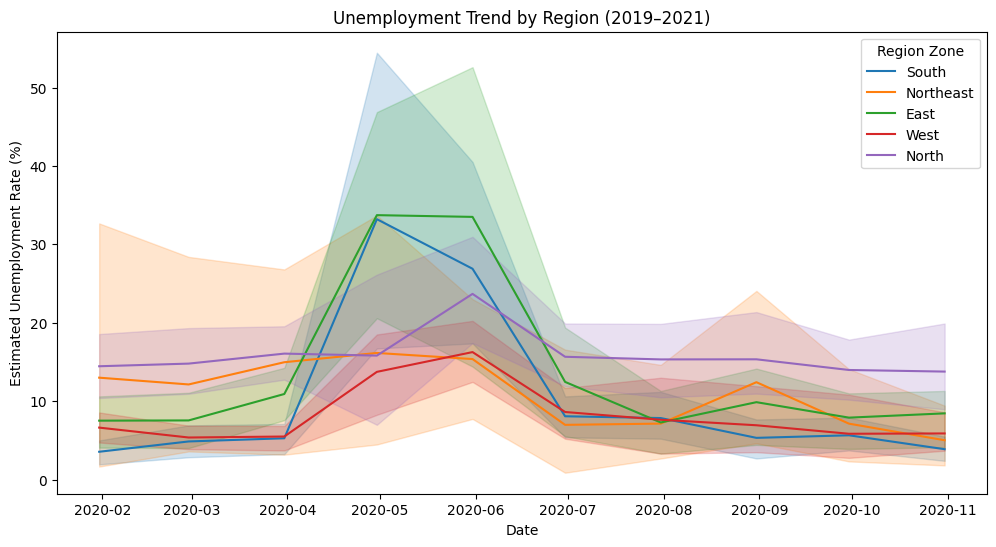

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)', hue='Region.1')
plt.title("Unemployment Trend by Region (2019–2021)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title='Region Zone')
plt.show()

step 6 :- Average Unemployment Rate by State

/tmp/ipython-input-4012224651.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette="viridis")


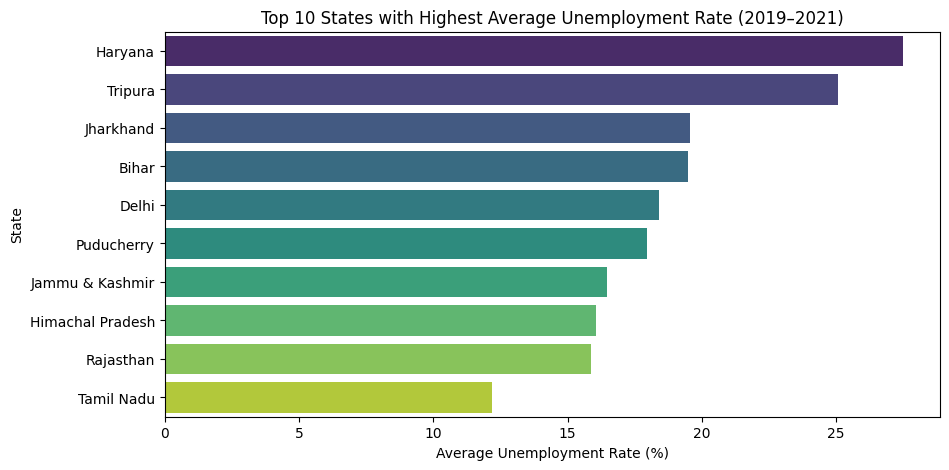

In [24]:
avg_unemployment = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette="viridis")
plt.title("Top 10 States with Highest Average Unemployment Rate (2019–2021)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.show()


step 7:- Correlation Analysis

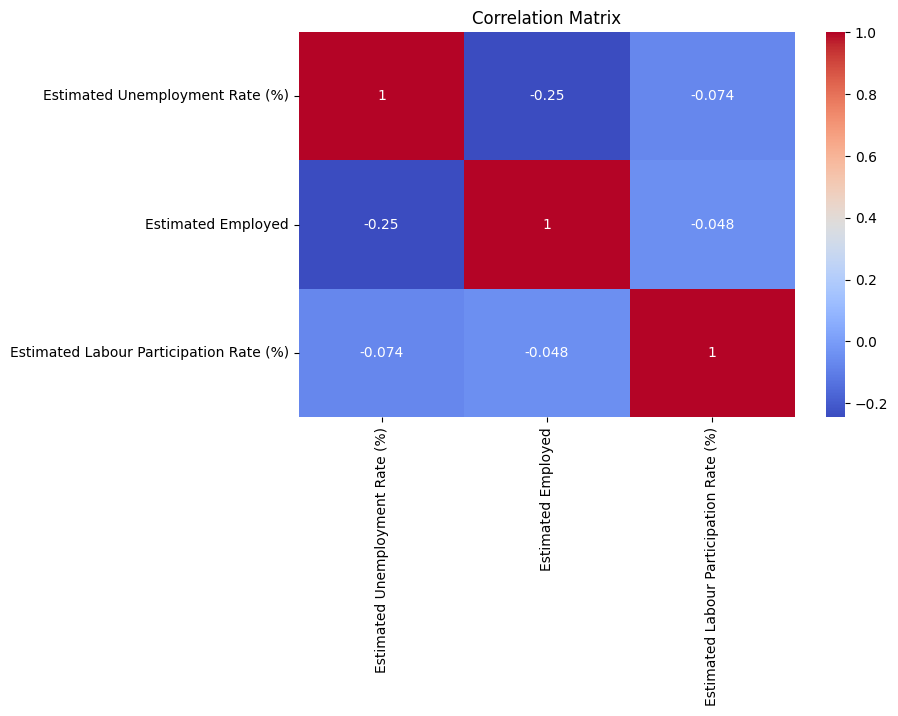

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df2[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##  Insights
1. Unemployment spiked drastically during **April–May 2020**, aligning with the national Covid-19 lockdown.  
2. States like **Haryana**, **Jharkhand**, and **Rajasthan** saw higher average unemployment rates.  
3. Labour participation rate tends to **decline** when unemployment increases.
**bold text**

##  Conclusion
This project provides a clear picture of how unemployment evolved in India during the Covid-19 period.

